In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib.patches import Arc
import numpy as np
from highlight_text import fig_text
import seaborn as sns
from matplotlib import colormaps
from matplotlib.colors import ListedColormap
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker, Sbopen)
from PIL import Image
import requests
from io import BytesIO
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

In [2]:
import requests

params ={
    'matchId':'4519549'
}

response = requests.get('https://www.fotmob.com/api/matchDetails',params=params)
data = response.json()


In [3]:
df_top_stats = pd.DataFrame(data['content']['stats']['Periods']['All']['stats'][0]['stats'])
df_shots = pd.DataFrame(data['content']['stats']['Periods']['All']['stats'][1]['stats'])
df_xg = pd.DataFrame(data['content']['stats']['Periods']['All']['stats'][2]['stats'])
df_passes = pd.DataFrame(data['content']['stats']['Periods']['All']['stats'][3]['stats'])
df_defense = pd.DataFrame(data['content']['stats']['Periods']['All']['stats'][4]['stats'])
df_duels = pd.DataFrame(data['content']['stats']['Periods']['All']['stats'][5]['stats'])
df_discipline = pd.DataFrame(data['content']['stats']['Periods']['All']['stats'][6]['stats'])

In [4]:
fh_added_time = 6
sh_added_time = 11
fhet_added_time = 0
shet_added_time = 0

In [5]:
expected_goals = True

In [6]:
df_score = pd.DataFrame(data['header']['teams'])
#df_score['Badge'] = df_score['name'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")
df_score['score'] = df_score['score'].astype(float)

In [7]:
df_score

,name,id,score,imageUrl,pageUrl,fifaRank
0,Derby County,10170,2.0,https://images.fotmob.com/image_resources/logo...,/teams/10170/overview/derby-county,None
1,Norwich City,9850,3.0,https://images.fotmob.com/image_resources/logo...,/teams/9850/overview/norwich-city,None


In [8]:
h_team = df_score['name'][0]
a_team = df_score['name'][1]
h_id = df_score['id'][0]
a_id = df_score['id'][1]
h_colour = data['general']['teamColors']['lightMode']['home']
a_colour = data['general']['teamColors']['lightMode']['away']
#h_badge = df_score['Badge'][0]
#a_badge = df_score['Badge'][1]
h_goals = df_score['score'][0]
a_goals = df_score['score'][1]

In [9]:
home_badge = Image.open(f"C:/Users/George/Documents/Football Analytics/Team Logos/{h_team.lower()}_logo.png")
away_badge = Image.open(f"C:/Users/George/Documents/Football Analytics/Team Logos/{a_team.lower()}_logo.png")

In [10]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Swansea City":"Swansea","Oxford United":"Oxford","Norwich City":"Norwich","Coventry City":"Coventry","Derby County":"Derby","Crystal Palace":"Palace","Brighton and Hove Albion": "Brighton", "Huddersfield Town":"Huddersfield","Manchester United": "Man Utd", "Newcastle United": "Newcastle", "Nottingham Forest":"Forest","Tottenham Hotspur": "Spurs","Sheffield United":"Sheff Utd", "West Ham United": "West Ham","West Bromwich Albion":"West Brom", "Wolverhampton Wanderers": "Wolves","Wycombe Wanderers":"Wycombe","Sheffield Wednesday":"Sheff Weds","Queens Park Rangers":"QPR","Rotherham United":"Rotherham","Preston North End":"Preston","Peterborough United":"P'borough Utd","Charlton Athletic":"Charlton","Bolton Wanderers":"Bolton","Blackburn Rovers":"Blackburn","Manchester City":"Man City"} 
mapping = MissingDict(**map_values)
h_team = mapping[h_team]
a_team = mapping[a_team]

In [11]:
top_stats = data['content']['stats']['Periods']['All']['stats'][0]['stats']
df_stats = pd.DataFrame(top_stats)

# Create a new DataFrame with the 'stats' column as a list
df_new = pd.DataFrame({'stats': df_stats['stats'].tolist()})

# Convert lists to strings before splitting
df_new['stats'] = df_new['stats'].apply(lambda x: ', '.join(map(str, x)))

# Split the 'stats' column into two columns based on the delimiter ', '
df_new[['home_stats', 'away_stats']] = df_new['stats'].str.split(', ', expand=True)

# Drop the original 'stats' column
df_new = df_new.drop('stats', axis=1)

# Concatenate the new columns with the original DataFrame
df_stats = pd.concat([df_stats, df_new], axis=1)
df_stats = df_stats.drop('stats', axis=1)

In [12]:
if expected_goals == True:
    df_xG = pd.DataFrame(data['content']['stats']['Periods']['All']['stats'][2]['stats'])
    df_xG.drop(0, axis=0, inplace=True)
    df_xG.drop(1, axis=0, inplace=True)
    df_xG.drop(4, axis=0, inplace=True)
    df_xG.drop('key', axis=1, inplace=True)
    df_xG.drop('type', axis=1, inplace=True)
    df_xG.reset_index(drop=True, inplace=True)
# Create a new DataFrame with the 'stats' column as a list
    df_new2 = pd.DataFrame({'stats': df_xG['stats'].tolist()})

# Convert lists to strings before splitting
    df_new2['stats'] = df_new2['stats'].apply(lambda x: ', '.join(map(str, x)))

# Split the 'stats' column into two columns based on the delimiter ', '
    df_new2[['home_stats', 'away_stats']] = df_new2['stats'].str.split(', ', expand=True)

# Drop the original 'stats' column
    df_new2 = df_new2.drop('stats', axis=1)

# Concatenate the new columns with the original DataFrame
    df_xG = pd.concat([df_xG, df_new2], axis=1)
    df_xG = df_xG.drop('stats', axis=1)

    df_xG[['home_stats', 'away_stats']] = df_xG[['home_stats', 'away_stats']].astype(float)

    away_prevented = (df_xG['home_stats'][2] - h_goals).round(2) 
    home_prevented = (df_xG['away_stats'][2] - a_goals).round(2)
    if home_prevented > away_prevented:
        highlight = 'home'
    else:
        highlight = 'away'
    goals_prevented = {'title':'Goals Prevented', 'highlighted': highlight,'home_stats': home_prevented, 'away_stats': away_prevented}

    df_xG.loc[len(df_xG)] = goals_prevented

In [13]:
shotmap = data['content']['shotmap']['shots']
df = pd.DataFrame(shotmap)

if df['period'].nunique() > 4:
    pen = data['header']['status']['reason']['long']
    pen = pen.split('Pen')[-1].strip()
else:
    pen = ''

periods = df['period'].nunique()

df = df[df['period'].isin(['FirstHalf', 'SecondHalf', 'FirstHalfExtra', 'SecondHalfExtra'])]

df.y = df.y * 1.473
df.x = df.x * 0.94

In [14]:
for x in range(len(df)):
    name = np.char.count(df['playerName'][x], ' ') + 1
    if name == 1:
        df['playerName'][x] = df['playerName'][x]
    elif name == 2:
        df['playerName'][x] = df['playerName'][x].split(' ')[1]
    elif name == 3:
        df['playerName'][x] = df['playerName'][x].split(' ')[1] + ' ' + df['playerName'][x].split(' ')[2]

C:\Users\dmsta\AppData\Local\Temp\ipykernel_22360\3626475897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['playerName'][x] = df['playerName'][x].split(' ')[1]
C:\Users\dmsta\AppData\Local\Temp\ipykernel_22360\3626475897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['playerName'][x] = df['playerName'][x].split(' ')[1]
C:\Users\dmsta\AppData\Local\Temp\ipykernel_22360\3626475897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [15]:
df_home = df[df.teamId == df_score['id'][0]].reset_index(drop=True)
df_away = df[df.teamId == df_score['id'][1]].reset_index(drop=True)

In [16]:
df['expectedGoals'].fillna(0, inplace=True)

In [17]:
home_own_goals = []
for x in df_home.index:
    if df_home['isOwnGoal'][x] == True:
        home_own_goals.append(df_home.iloc[x])
        df_home.drop(x, axis=0, inplace=True)
    else:
        pass

away_own_goals = []
for x in df_away.index:
    if df_away['isOwnGoal'][x] == True:
        away_own_goals.append(df_away.iloc[x])
        df_away.drop(x, axis=0, inplace=True)
    else:
        pass

df_home_own_goals = pd.DataFrame(home_own_goals)
df_away_own_goals = pd.DataFrame(away_own_goals)
try:
    df_home_own_goals.x = 99-df_home_own_goals.x
    df_home_own_goals.y = 100-df_home_own_goals.y
except:
    pass
try:
    df_away_own_goals.x = 99-df_away_own_goals.x
    df_away_own_goals.y = 100-df_away_own_goals.y
except:
    pass
df_home = pd.concat([df_home, df_away_own_goals], ignore_index=True)
df_away = pd.concat([df_away, df_home_own_goals], ignore_index=True)
df_home = df_home.sort_values(by='min', ascending=True)
df_away = df_away.sort_values(by='min', ascending=True)
df_home.reset_index(inplace=True, drop=True)
df_away.reset_index(inplace=True, drop=True)
df_home.fillna(0, inplace=True)
df_away.fillna(0, inplace=True)

In [18]:
df_away_own_goals

""


In [19]:
df.fillna(0, inplace=True)

In [20]:
df_events = pd.DataFrame(data['content']['matchFacts']['events']['events'])

In [21]:
first_half_added_time = fh_added_time
second_half_added_time = sh_added_time
first_half_extra_time = fhet_added_time
second_half_extra_time = shet_added_time

In [22]:
df_cards = df_events[df_events['type'] == 'Card']
df_cards.reset_index(inplace = True)
df_cards.drop('index',inplace=True, axis=1)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_22360\1051646326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cards.drop('index',inplace=True, axis=1)


In [23]:
df_cards['min'] = df_cards['time'] + df_cards['overloadTime']

C:\Users\dmsta\AppData\Local\Temp\ipykernel_22360\4254691307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cards['min'] = df_cards['time'] + df_cards['overloadTime']


In [24]:
for card in df_cards.index:
    if df_cards['cardDescription'][card] == None:
        continue
    elif pd.isna(df_cards['cardDescription'][card]):
        continue
    else:
        df_cards.drop(card, axis=0, inplace=True)

df_cards.reset_index(drop=True, inplace=True)

In [25]:
df_cards = df_cards[['min','card','player','isHome']]
df_home_cards = df_cards[df_cards['isHome'] == True]
df_away_cards = df_cards[df_cards['isHome'] == False]
df_home_yellows = df_home_cards[df_home_cards['card'] == 'Yellow']
df_away_yellows = df_away_cards[df_away_cards['card'] == 'Yellow']
df_home_reds = df_home_cards[(df_home_cards['card'] == 'Red') | (df_home_cards['card'] == 'YellowRed')]
df_away_reds = df_away_cards[(df_away_cards['card'] == 'Red') | (df_away_cards['card'] == 'YellowRed')]
df_home_yellows.reset_index(inplace = True)
df_away_yellows.reset_index(inplace = True)
df_home_reds.reset_index(inplace = True)
df_away_reds.reset_index(inplace = True)

In [26]:
df_away_reds

,index,min,card,player,isHome


In [27]:
a_xG = [0]
h_xG = [0]
a_xGOT = [0]
h_xGOT = [0]
a_min = [0]
h_min = [0]
a_min_xGOT = [0]
h_min_xGOT = [0]

for x in range(len(df_home)):
    if df_home['period'][x] == 'FirstHalf':
        h_xG.append(df_home['expectedGoals'][x])
        h_min.append(df_home['min'][x] + df_home['minAdded'][x])
        h_xGOT.append(df_home['expectedGoalsOnTarget'][x])
        h_min_xGOT.append(df_home['min'][x] + df_home['minAdded'][x])
    if df_home['period'][x] == 'SecondHalf':
        h_xG.append(df_home['expectedGoals'][x])
        h_min.append(df_home['min'][x] + df_home['minAdded'][x] + first_half_added_time)
        h_xGOT.append(df_home['expectedGoalsOnTarget'][x])
        h_min_xGOT.append(df_home['min'][x] + df_home['minAdded'][x] + first_half_added_time)
    if df_home['period'][x] == 'FirstHalfExtra':
        h_xG.append(df_home['expectedGoals'][x])
        h_min.append(df_home['min'][x] + df_home['minAdded'][x] + first_half_added_time + second_half_added_time)
        h_xGOT.append(df_home['expectedGoalsOnTarget'][x])
        h_min_xGOT.append(df_home['min'][x] + df_home['minAdded'][x] + first_half_added_time + second_half_added_time)
    if df_home['period'][x] == 'SecondHalfExtra':
        h_xG.append(df_home['expectedGoals'][x])
        h_min.append(df_home['min'][x] + df_home['minAdded'][x] + first_half_added_time + second_half_added_time + first_half_extra_time)
        h_xGOT.append(df_home['expectedGoalsOnTarget'][x])
        h_min_xGOT.append(df_home['min'][x] + df_home['minAdded'][x] + first_half_added_time + second_half_added_time + first_half_extra_time)

for x in range(len(df_away)):
    if df_away['period'][x] == 'FirstHalf':
        a_xG.append(df_away['expectedGoals'][x])
        a_min.append(df_away['min'][x] + df_away['minAdded'][x])
        a_xGOT.append(df_away['expectedGoalsOnTarget'][x])
        a_min_xGOT.append(df_away['min'][x] + df_away['minAdded'][x])
    if df_away['period'][x] == 'SecondHalf':
        a_xG.append(df_away['expectedGoals'][x])
        a_min.append(df_away['min'][x] + df_away['minAdded'][x] + first_half_added_time)
        a_xGOT.append(df_away['expectedGoalsOnTarget'][x])
        a_min_xGOT.append(df_away['min'][x] + df_away['minAdded'][x] + first_half_added_time)
    if df_away['period'][x] == 'FirstHalfExtra':
        a_xG.append(df_away['expectedGoals'][x])
        a_min.append(df_away['min'][x] + df_away['minAdded'][x] + first_half_added_time + second_half_added_time)
        a_xGOT.append(df_away['expectedGoalsOnTarget'][x])
        a_min_xGOT.append(df_away['min'][x] + df_away['minAdded'][x] + first_half_added_time + second_half_added_time)
    if df_away['period'][x] == 'SecondHalfExtra':
        a_xG.append(df_away['expectedGoals'][x])
        a_min.append(df_away['min'][x] + df_away['minAdded'][x] + first_half_added_time + second_half_added_time + first_half_extra_time)
        a_xGOT.append(df_away['expectedGoalsOnTarget'][x])
        a_min_xGOT.append(df_away['min'][x] + df_away['minAdded'][x] + first_half_added_time + second_half_added_time + first_half_extra_time)

a_xG.append(0)
h_xG.append(0)
a_xGOT.append(0)
h_xGOT.append(0)
if df['period'].nunique() > 2:
    a_min.append(120 + second_half_added_time + first_half_added_time + first_half_extra_time + second_half_extra_time)
    h_min.append(120 + second_half_added_time + first_half_added_time + first_half_extra_time + second_half_extra_time)
    a_min_xGOT.append(120 + second_half_added_time + first_half_added_time + first_half_extra_time + second_half_extra_time)
    h_min_xGOT.append(120 + second_half_added_time + first_half_added_time + first_half_extra_time + second_half_extra_time)
else:
    a_min.append(90 + second_half_added_time + first_half_added_time)
    h_min.append(90 + second_half_added_time + first_half_added_time)
    a_min_xGOT.append(90 + second_half_added_time + first_half_added_time)
    h_min_xGOT.append(90 + second_half_added_time + first_half_added_time)
#df_away.x = 100 - df_away.x
#df_away.y = 100 - df_away.y

In [28]:
a_min.sort()
h_min.sort()
a_min_xGOT.sort()
h_min_xGOT.sort()

In [29]:
df_home_goals = df_home[df_home.eventType == 'Goal']
df_home_non_goals = df_home[df_home.eventType != 'Goal']
df_away_goals = df_away[df_away.eventType == 'Goal']
df_away_non_goals = df_away[df_away.eventType != 'Goal']

In [30]:
df_home['xGcum'] = np.cumsum(df_home['expectedGoals'])
df_away['xGcum'] = np.cumsum(df_away['expectedGoals'])
df_home['xGOTcum'] = np.cumsum(df_home['expectedGoalsOnTarget'])
df_away['xGOTcum'] = np.cumsum(df_away['expectedGoalsOnTarget'])

In [31]:
def nums_cum_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]
a_cumulative = nums_cum_sum(a_xG)
h_cumulative = nums_cum_sum(h_xG)

In [32]:
fill_value = 0
h_xGOT = [x if x > 0 else fill_value for x in h_xGOT]
a_xGOT = [x if x > 0 else fill_value for x in a_xGOT]
a_cumulativeOT = nums_cum_sum(a_xGOT)
h_cumulativeOT = nums_cum_sum(h_xGOT)

In [33]:
df_home.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'firstName',
       'lastName', 'fullName', 'teamColor', 'xGcum', 'xGOTcum'],
      dtype='object')

In [34]:
# creating the dictionaries
df_home_first = df_home[df_home['period'] == 'FirstHalf']
df_home_second = df_home[df_home['period'] == 'SecondHalf']
df_away_first = df_away[df_away['period'] == 'FirstHalf']
df_away_second = df_away[df_away['period'] == 'SecondHalf']
df_home_third = df_home[df_home['period'] == 'FirstHalfExtra']
df_home_fourth = df_home[df_home['period'] == 'SecondHalfExtra']
df_away_third = df_away[df_away['period'] == 'FirstHalfExtra']
df_away_fourth = df_away[df_away['period'] == 'SecondHalfExtra']
x_first = (df_home_first[df_home_first['eventType']=='Goal']['min'] + df_home_first[df_home_first['eventType']=='Goal']['minAdded']).tolist()
x1_first = (df_away_first[df_away_first['eventType']=='Goal']['min'] + df_away_first[df_away_first['eventType']=='Goal']['minAdded']).tolist()
x_second = (df_home_second[df_home_second['eventType']=='Goal']['min'] + df_home_second[df_home_second['eventType']=='Goal']['minAdded']).tolist()
x1_second = (df_away_second[df_away_second['eventType']=='Goal']['min'] + df_away_second[df_away_second['eventType']=='Goal']['minAdded']).tolist()
x_third = (df_home_third[df_home_third['eventType']=='Goal']['min'] + df_home_third[df_home_third['eventType']=='Goal']['minAdded']).tolist()
x1_third = (df_away_third[df_away_third['eventType']=='Goal']['min'] + df_away_third[df_away_third['eventType']=='Goal']['minAdded']).tolist()
x_fourth = (df_home_fourth[df_home_fourth['eventType']=='Goal']['min'] + df_home_fourth[df_home_fourth['eventType']=='Goal']['minAdded']).tolist()
x1_fourth = (df_away_fourth[df_away_fourth['eventType']=='Goal']['min'] + df_away_fourth[df_away_fourth['eventType']=='Goal']['minAdded']).tolist()
y =df_home[df_home['eventType']=='Goal']['xGcum'].tolist()
y1 = df_away[df_away['eventType']=='Goal']['xGcum'].tolist()
y2 = df_home[df_home['eventType']=='Goal']['xGOTcum'].tolist()
y3 = df_away[df_away['eventType']=='Goal']['xGOTcum'].tolist()

In [35]:
for i in range(len(x_second)):
    x_second[i] = x_second[i] + first_half_added_time

for i in range(len(x_third)):
    x_third[i] = x_third[i] + first_half_added_time + second_half_added_time

for i in range(len(x_fourth)):
    x_fourth[i] = x_fourth[i] + first_half_added_time + second_half_added_time + first_half_extra_time

x = x_first + x_second + x_third + x_fourth

for i in range(len(x1_second)):
    x1_second[i] = x1_second[i] + first_half_added_time

for i in range(len(x1_third)):
    x1_third[i] = x1_third[i] + first_half_added_time + second_half_added_time

for i in range(len(x1_fourth)):
    x1_fourth[i] = x1_fourth[i] + first_half_added_time + second_half_added_time + first_half_extra_time

x1 = x1_first + x1_second + x1_third + x1_fourth


In [36]:
# expectedGoals inside the scatterplots
y_plot =np.round(df_home[df_home['eventType']=='Goal']['expectedGoals'],2).tolist()
y1_plot = np.round(df_away[df_away['eventType']=='Goal']['expectedGoals'],2).tolist()
y2_plot = np.round(df_home[df_home['eventType']=='Goal']['expectedGoalsOnTarget'],2).tolist()
y3_plot = np.round(df_away[df_away['eventType']=='Goal']['expectedGoalsOnTarget'],2).tolist()

# Annotation text
text_home = df_home[df_home['eventType']=='Goal']['playerName'].tolist()
text_away = df_away[df_away['eventType']=='Goal']['playerName'].tolist()

# More annotation text
xGcum_away = str(np.round(df_away['xGcum'].iloc[-1],3))
xGcum_home = str(np.round(df_home['xGcum'].iloc[-1],3))
xGOTcum_away = str(np.round(df_away['xGOTcum'].iloc[-1],3))
xGOTcum_home = str(np.round(df_home['xGOTcum'].iloc[-1],3))

In [37]:
import random
def sim_game_xG(v):
    #mid is the match ID
    #ht is home team and at is away team
    ht, at = v[0], v[1]
    
    #selecting home team df in the game
    home_sht = df[df.teamId == ht]
    
    #selecting away team df in the game
    away_sht = df[df.teamId == at]
    
    #simulating HT goals
    home_goals = 0
    for i, s in home_sht.iterrows():
        
        x = random.random()
        if s["expectedGoals"] > x:
            home_goals+=1
    
    #simulating AT goals
    away_goals = 0
    for i, s in away_sht.iterrows():
        x = random.random()
        if s["expectedGoals"] > x:
            away_goals+=1
    
    #seeing match winner
    if home_goals > away_goals:
        return "home"
    elif away_goals > home_goals:
        return "away"
    else:
        return "draw"

def get_xG_sim(ht, at, n=10000):
    home_wins = 0
    away_wins = 0
    draws = 0
    
    sim_vals = (ht, at)
    
    res = []
    for i in range(n):
        res.append(sim_game_xG(sim_vals))
        
    
    home_wins = len([a for a in res if a=="home"])
    away_wins = len([a for a in res if a=="away"])
    draws = len([a for a in res if a=="draw"])
    
    #home_points = ((home_wins*3)+(draws))/n
    #away_points = ((away_wins*3)+(draws))/n

    home_wins_perc = home_wins/n
    away_wins_perc = away_wins/n
    draws_perc = draws/n
    return home_wins_perc, away_wins_perc, draws_perc

In [38]:
xG_sim = get_xG_sim(h_id,a_id, 10000)
home_wins_perc = xG_sim[0] *100
away_wins_perc = xG_sim[1] * 100
draws_perc = xG_sim[2] * 100

home_wins_perc, away_wins_perc, draws_perc = round(home_wins_perc, 1), round(away_wins_perc, 1), round(draws_perc, 1)

In [39]:
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')

In [40]:
first_half = df[(df['period'] == 'FirstHalf') | (df['period'] == 'FirstHalf')]
first_half_goals = first_half[first_half['eventType'] == 'Goal']
first_half_home_goals = len(first_half_goals[first_half_goals['teamId'] == h_id])
first_half_away_goals = len(first_half_goals[first_half_goals['teamId'] == a_id])

In [41]:
df_home_goals.fillna(0, inplace=True)
df_away_goals.fillna(0, inplace=True)
df_home_goals['minAdded'] = df_home_goals['minAdded'].astype(int)
df_away_goals['minAdded'] = df_away_goals['minAdded'].astype(int)
df_home_goals.reset_index(drop=True, inplace=True)
df_away_goals.reset_index(drop=True, inplace=True)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_22360\1500822124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home_goals.fillna(0, inplace=True)
C:\Users\dmsta\AppData\Local\Temp\ipykernel_22360\1500822124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_away_goals.fillna(0, inplace=True)
C:\Users\dmsta\AppData\Local\Temp\ipykernel_22360\1500822124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [42]:
match_type = data['general']['leagueName']
match_round = data['general']['leagueRoundName']
match_date = data['general']['matchTimeUTC']
attendance = data['content']['matchFacts']['infoBox']['Attendance']

In [43]:
parts = match_date.split(', ')
match_date = ', '.join(parts[:3])
match_date

'Sat, Sep 28, 2024'

In [44]:
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system

In [45]:
df_home_own_goals

""


In [46]:
h_cumulative =np.array(h_cumulative)
a_cumulative = np.array(a_cumulative)

In [47]:
df_xg.drop(1, axis=0, inplace=True)

In [48]:
df_passes.drop(1, axis=0, inplace=True)
df_passes.drop(2, axis=0, inplace=True)
df_passes.drop(3, axis=0, inplace=True)
df_passes.drop(4, axis=0, inplace=True)
df_passes.drop(7, axis=0, inplace=True)
df_passes.drop(9, axis=0, inplace=True)

In [49]:
df_stat_table = pd.concat([df_top_stats, df_passes, df_xg, df_defense], ignore_index=True)
for i in range(len(df_stat_table)):
    if df_stat_table['highlighted'][i] == 'equal':
        df_stat_table.drop(i, axis=0, inplace=True)

In [50]:
df_stat_table.reset_index(drop=True, inplace=True)
df_stat_table

,title,key,stats,type,highlighted
0,Ball possession,BallPossesion,"[42, 58]",graph,away
1,Expected goals (xG),expected_goals,"[1.12, 2.09]",text,away
2,Total shots,total_shots,"[16, 9]",text,home
3,Shots on target,ShotsOnTarget,"[5, 4]",text,home
4,Big chances,big_chance,"[0, 3]",text,away
5,Big chances missed,big_chance_missed_title,"[0, 1]",text,home
6,Accurate passes,accurate_passes,"[259 (80%), 387 (84%)]",text,away
7,Fouls committed,fouls,"[13, 7]",text,away
8,Corners,corners,"[9, 5]",text,home
9,Accurate long balls,long_balls_accurate,"[26 (44%), 13 (32%)]",text,home


In [51]:
df_temp = pd.DataFrame({'stats': df_stat_table['stats'].tolist()})
df_temp['stats'] = df_temp['stats'].apply(lambda x: ', '.join(map(str, x)))
df_temp[['home_stats', 'away_stats']] = df_temp['stats'].str.split(', ', expand=True)
df_temp.drop('stats', axis=1, inplace=True)
df_stat_table = pd.concat([df_stat_table, df_temp], axis=1)
df_stat_table

,title,key,stats,type,highlighted,home_stats,away_stats
0,Ball possession,BallPossesion,"[42, 58]",graph,away,42,58
1,Expected goals (xG),expected_goals,"[1.12, 2.09]",text,away,1.12,2.09
2,Total shots,total_shots,"[16, 9]",text,home,16,9
3,Shots on target,ShotsOnTarget,"[5, 4]",text,home,5,4
4,Big chances,big_chance,"[0, 3]",text,away,0,3
5,Big chances missed,big_chance_missed_title,"[0, 1]",text,home,0,1
6,Accurate passes,accurate_passes,"[259 (80%), 387 (84%)]",text,away,259 (80%),387 (84%)
7,Fouls committed,fouls,"[13, 7]",text,away,13,7
8,Corners,corners,"[9, 5]",text,home,9,5
9,Accurate long balls,long_balls_accurate,"[26 (44%), 13 (32%)]",text,home,26 (44%),13 (32%)


In [52]:
df_stat_table.drop('key', axis=1, inplace=True)
df_stat_table.drop('type', axis=1, inplace=True)
df_stat_table_plot = df_stat_table[['home_stats','title','away_stats']]
df_stat_table_plot.rename(columns={'home_stats':h_team,'away_stats':a_team,'title':''}, inplace=True)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_22360\2198538278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stat_table_plot.rename(columns={'home_stats':h_team,'away_stats':a_team,'title':''}, inplace=True)


In [53]:
bg_colour = "#EFE9E6"
text_colour = "#FFFFFF"
plt.rcParams["text.color"] = text_colour

col_defs = [
    ColumnDefinition(
        name=h_team,
        title = '',
        textprops={"ha" : "center", "color": h_colour, "weight": "bold", 'fontproperties': regular, 'fontsize': 24},
        width=0.5,
    ), 
    ColumnDefinition(
        name='',
        textprops={"ha" : "center", 'fontsize': 30, "color": 'black', 'fontproperties': bold},
        width=1.0,
    ),
    ColumnDefinition(
        name=a_team,
        title = '',
        textprops={"ha" : "center", "color": a_colour, "weight": "bold", 'fontproperties': regular, 'fontsize': 24},
        width=0.5,
    )
]

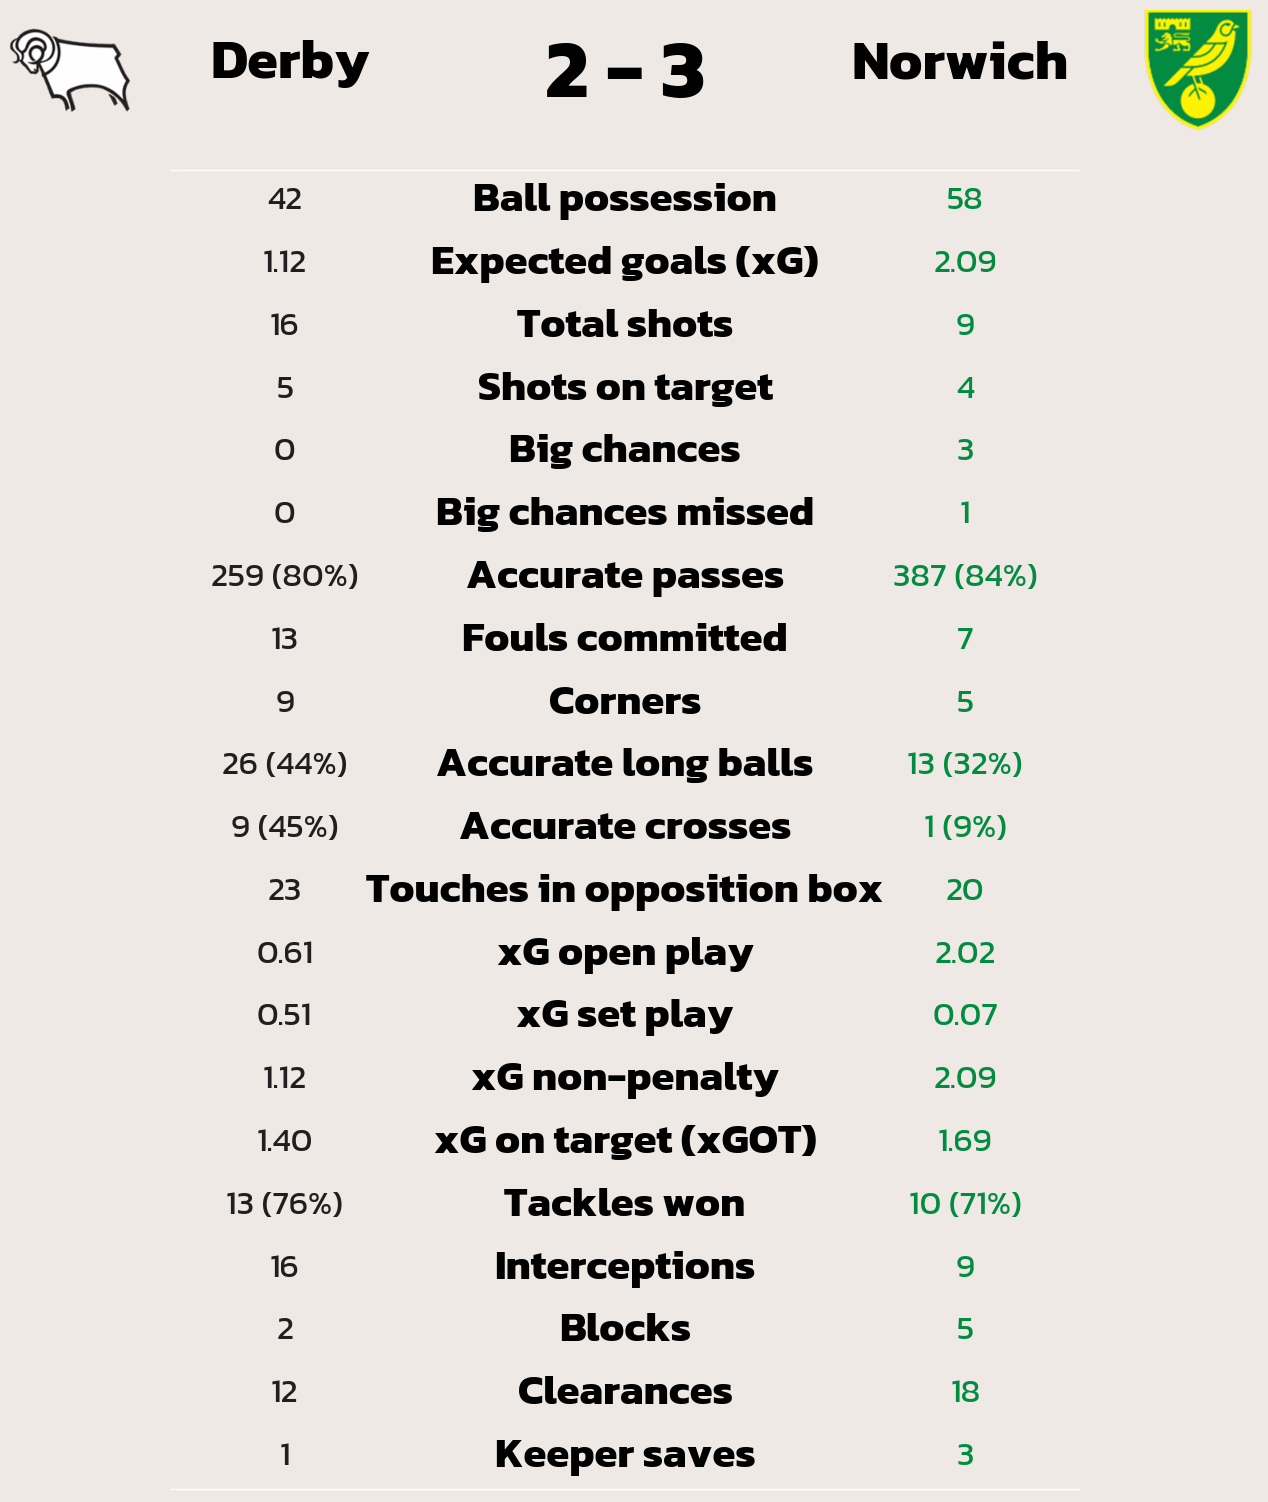

In [54]:
fig, ax = plt.subplots(figsize=(12, 18), facecolor=bg_colour)

ax.set_facecolor(bg_colour)

table = Table(
    df_stat_table_plot,
    column_definitions=col_defs,
    index_col=h_team,
    footer_divider=True,
    textprops={"fontsize" : 12},
    ax=ax,
    row_dividers=False,
    row_divider_kw={"visible": False},
    cell_kw={"facecolor": bg_colour, "edgecolor": bg_colour},
)

from skimage import io
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

home_logo = io.imread(data['header']['teams'][0]['imageUrl'])
away_logo = io.imread(data['header']['teams'][1]['imageUrl'])

home_logo_ax = OffsetImage(home_logo)
away_logo_ax = OffsetImage(away_logo)
home_logo_ax = fig.add_axes([0, 0.85, 0.1, 0.1], zorder=1)
home_logo_ax.imshow(home_logo)
home_logo_ax.axis("off")

away_logo_ax = fig.add_axes([0.94, 0.85, 0.1, 0.1], zorder=1)
away_logo_ax.imshow(away_logo)
away_logo_ax.axis("off")

h_goals = h_goals.astype(int)
a_goals = a_goals.astype(int)

ax.annotate(f"{h_team}", xy=(0.3, 1), xytext=(0.14, 1.02), xycoords='axes fraction', fontproperties = bold, fontsize=40, color='black', ha='center')
ax.annotate(f"{a_team}", xy=(0.7, 1), xytext=(0.86, 1.02), xycoords='axes fraction', fontproperties = bold, fontsize=40, color='black', ha='center')
ax.annotate(f"{h_goals} - {a_goals}", xy=(0.5, 1), xytext=(0.5, 1.02), xycoords='axes fraction', fontproperties = bold, fontsize=60, color='black', ha='center', va='center')

fig.savefig(f"C:/Users/George/Documents/Football Analytics/Visuals/{h_team} vs {a_team} Stats Table.png", facecolor=fig.get_facecolor(), dpi=200, bbox_inches="tight")

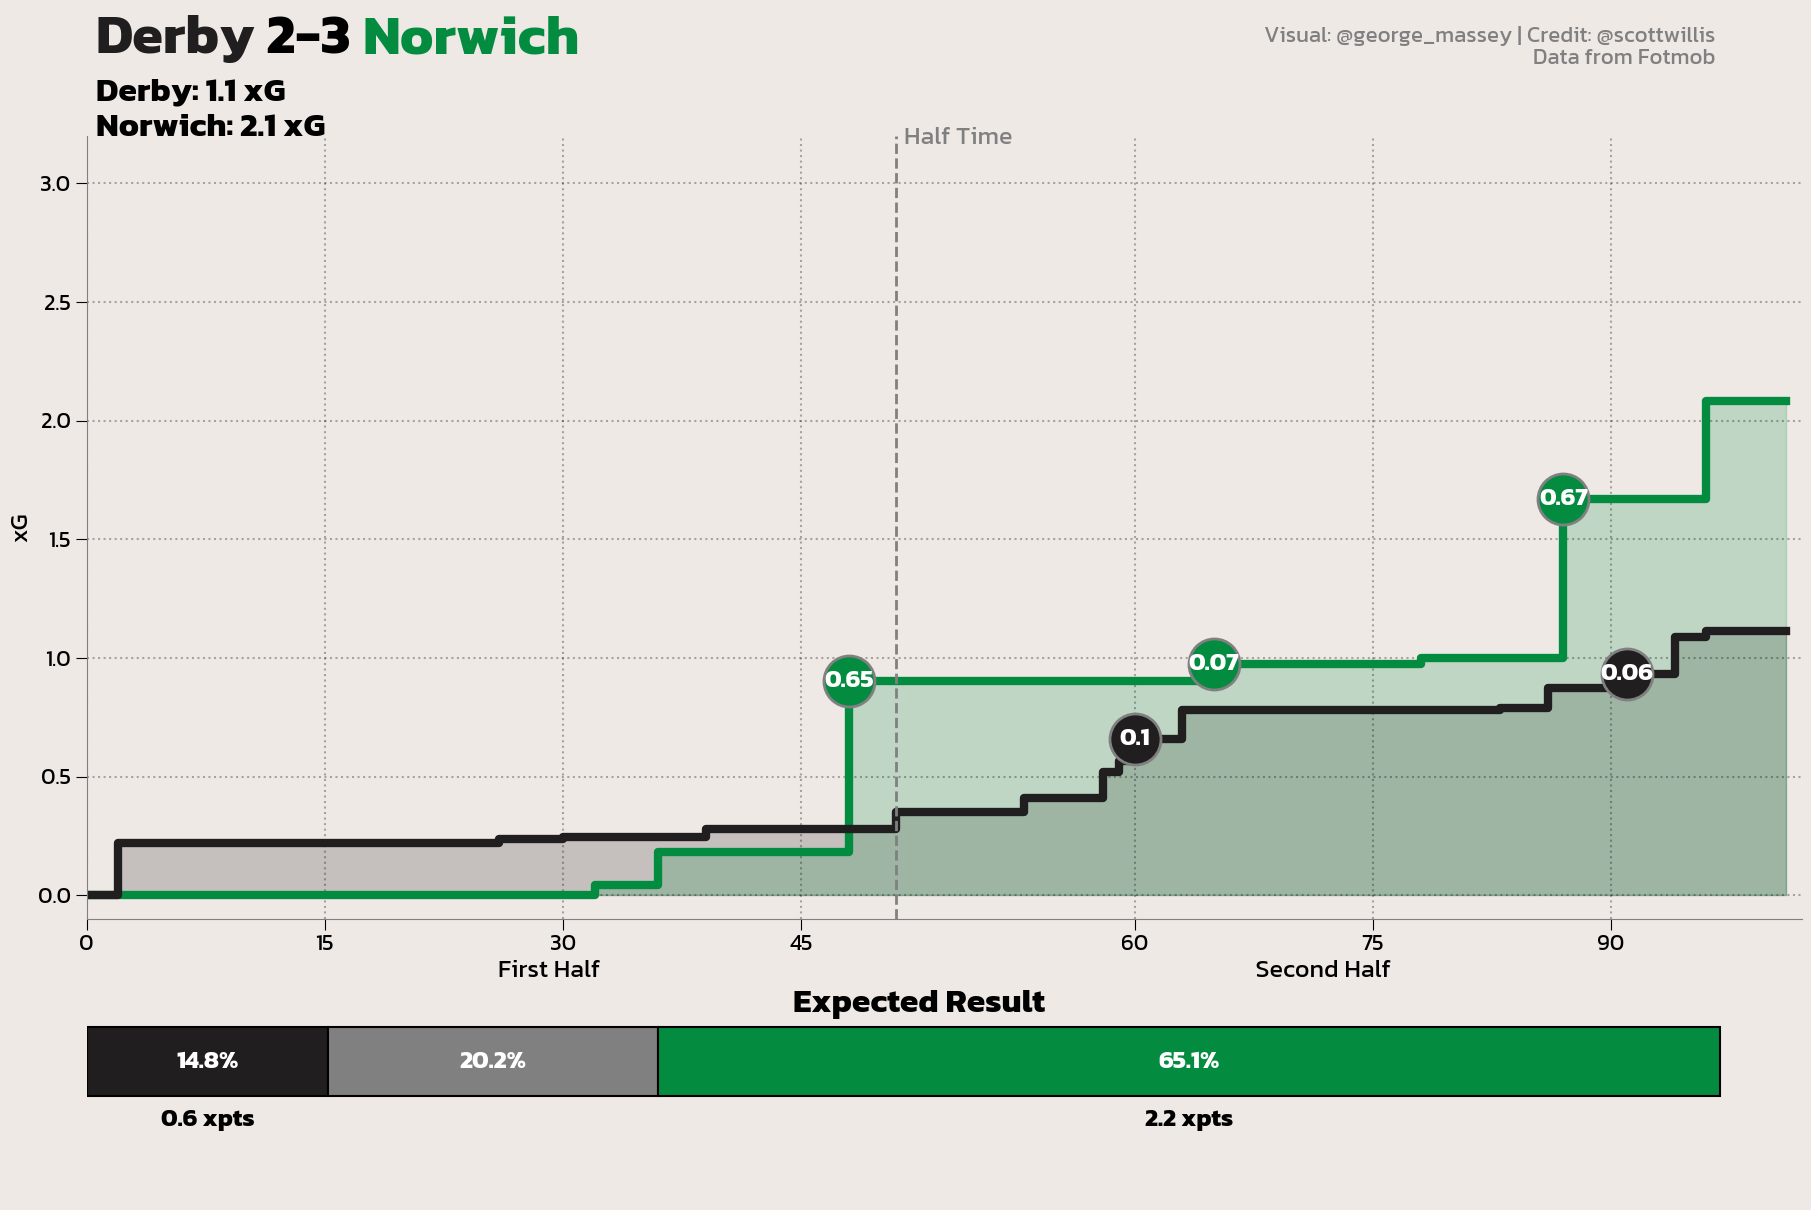

In [55]:
# XG FLOWCHART
import matplotlib.pyplot as plt
import highlight_text

home_xp = round(((home_wins_perc * 3 + draws_perc) / 100),1)
away_xp = round(((away_wins_perc * 3 + draws_perc) / 100),1)

fig = plt.figure(figsize=(18, 12), constrained_layout=True, facecolor='#EFE9E6')
gs = fig.add_gridspec(5, 1)
ax = fig.add_subplot(gs[0:4, 0])
#plt.style.use('fivethirtyeight')
ax.patch.set_facecolor('#EFE9E6')
fig.set_facecolor('#EFE9E6')

ax.grid(
    axis = "both",
    visible = True, 
    lw = 1.5,
    ls = ":",
    alpha = 0.3,
    color = "black"
)

ax.tick_params(
    color = "black", 
    length = 8, 
    which = "major", 
    labelsize = 14,
    labelcolor = "black",
    zorder = 3
)

ax.step(x = a_min ,y = a_cumulative , where = 'post', color = a_colour ,linewidth = 6.0)
ax.step(x = h_min ,y = h_cumulative , where = 'post', color = h_colour ,linewidth = 6.0)
ax.fill_between(h_min, h_cumulative, 0, where= h_cumulative >= 0, color=h_colour, alpha=0.2, interpolate=False, step='post')
ax.fill_between(a_min, a_cumulative, 0, where=(a_cumulative >= 0), color=a_colour, alpha=0.2, interpolate=False, step='post')

ax.scatter(x=x,y=y, color=h_colour, edgecolor='grey',s=1350, label=h_team,linewidths=2, zorder = 3)
ax.scatter(x=x1,y=y1, color=a_colour, edgecolor='grey',s=1350, label=a_team,linewidths=2, zorder = 3)
if len(df_home_reds) > 0:
    ax.scatter(x = df_home_reds['min'], y = 0.605, color = 'red', marker='s', s=800, zorder = 5, edgecolor='black', linewidth=1.5)
if len(df_away_reds) > 0:
    ax.scatter(x = df_away_reds['min'], y = 0.605, color = 'red', marker='s', s=800, zorder = 5, edgecolor='black', linewidth=1.5)

max_xG = max(max(a_cumulative),max(h_cumulative))
max_value = max_xG

for i in range(len(x)):
    plt.annotate(round(y_plot[i],2), (x[i], y[i]),c='white',size=18,ha='center',va='center',fontweight='bold', zorder = 5, fontproperties=bold)
# Away team
for i in range(len(x1)):
    plt.annotate(round(y1_plot[i],2), (x1[i], y1[i]),c='white',size=18,ha='center',va='center',fontweight='bold', zorder = 5, fontproperties=bold)

ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")
if df['period'].nunique() > 2:
    plt.xticks([0,15,30,45,60+first_half_added_time,75+first_half_added_time,90+first_half_added_time,105+first_half_added_time+second_half_added_time,120+first_half_added_time+second_half_added_time+first_half_extra_time]
               ,['0','15','30','45','60','75','90','105','120']) # fix this 
else:
    plt.xticks([0,15,30,45,60+first_half_added_time,75+first_half_added_time,90+first_half_added_time], ['0','15','30','45','60','75','90'])
plt.xlabel('First Half                                                                                                                  Second Half',color='black',fontsize=18,loc='center',fontproperties=regular)
plt.ylabel('xG',color='black',fontsize=18,fontproperties=regular)
plt.axvline(x=45+first_half_added_time, color='grey', linestyle='--', linewidth=2, zorder = 2)
plt.annotate('Half Time', xy=(45.5+first_half_added_time, 3.19), fontproperties=regular, fontsize=18, color='grey', ha='left', va='center')
if df['period'].nunique() > 2:
    plt.axvline(x=90+first_half_added_time+second_half_added_time, color='grey', linestyle='--', linewidth=2, zorder = 2)
    plt.annotate('Extra Time', xy=(90.5+first_half_added_time+second_half_added_time, 3.2), fontproperties=regular, fontsize=12, color='grey', ha='left', va='center')
plt.ylim(-0.1,3.2)
plt.xlim(0,91+first_half_added_time+second_half_added_time+first_half_extra_time)
plt.xticks(fontproperties=regular,fontsize=16)
plt.yticks(fontproperties=regular,fontsize=16)
h_goals = h_goals.astype(int)
a_goals = a_goals.astype(int)
highlight_text.fig_text(0.05, 0.97, f'<{h_team}> {h_goals}-{a_goals} <{a_team}>', size=40, highlight_textprops=[{"color": h_colour}, {"color": a_colour}], ha='left', va='center', fontproperties=bold, color='black')
fig.text(0.05, 0.92, f'{h_team}: {round(h_cumulative[-1],1)} xG', color='black', fontsize=24, ha='left', fontweight='bold',fontproperties=bold)
fig.text(0.05, 0.89, f'{a_team}: {round(a_cumulative[-1],1)} xG', color='black', fontsize=24, ha='left', fontweight='bold',fontproperties=bold)

# Define bar parameters
x_values = [0, home_wins_perc, home_wins_perc+draws_perc]  # Positions on the x-axis for segments
y_values = [1,1,1]  # Position on the y-axis (slightly below the plot)
bar_widths = [home_wins_perc, draws_perc, away_wins_perc]  # Width of each bar segment
bar_colors = [h_colour, 'grey',a_colour]  # Colors for each segment
labels = [f'{home_wins_perc}%', f'{draws_perc}%', f'{away_wins_perc}%']  # Labels for each segment
point_labels = [f'{home_wins_perc}%', f'{draws_perc}%', f'{away_wins_perc}%']

# Create a new axis for the horizontal bar
ax2 = fig.add_subplot(gs[4, 0])
# Add horizontal bars
for x2, y2, width, color, label in zip(x_values, y_values, bar_widths, bar_colors, labels):
    ax2.barh(y2, width, left=x2, height=0.6, color=color, alpha=1, label=label, align='center', edgecolor='black', linewidth=1.5)

# Remove the axis lines and ticks from the secondary axis
ax2.axis('off')

# Add labels and text inside the bars
for x3, y3, width, label in zip(x_values, y_values, bar_widths, labels):
    plt.text(x3 + width / 2, y3, label, ha='center', va='center', color='white', fontsize=18, fontweight='bold',fontproperties=bold)

plt.text(home_wins_perc/2, 0.5, f'{home_xp} xpts', ha='center', va='center', color='black', fontsize=18, fontweight='bold',fontproperties=bold)
plt.text(home_wins_perc+draws_perc+away_wins_perc /2, 0.5, f'{away_xp} xpts', ha='center', va='center', color='black', fontsize=18, fontweight='bold',fontproperties=bold)
# Adjust plot limits
plt.ylim(-0.2, 1.5)  # Adjust y-limits to accommodate the new bar
plt.text(45+first_half_added_time, 1.5, 'Expected Result', ha='center', va='center', color='black', fontsize=24, fontweight='bold',fontproperties=bold)
fig.text(0.95,0.95,'Visual: @george_massey | Credit: @scottwillis\nData from Fotmob',color='grey',fontsize=16,ha='right',fontweight='bold',fontproperties=regular)

plt.savefig(f"C:/Users/George/Documents/Football Analytics/Visuals/{h_team} vs {a_team} XG Flowchart.png", facecolor=fig.get_facecolor(), dpi=200, bbox_inches="tight")

plt.show()


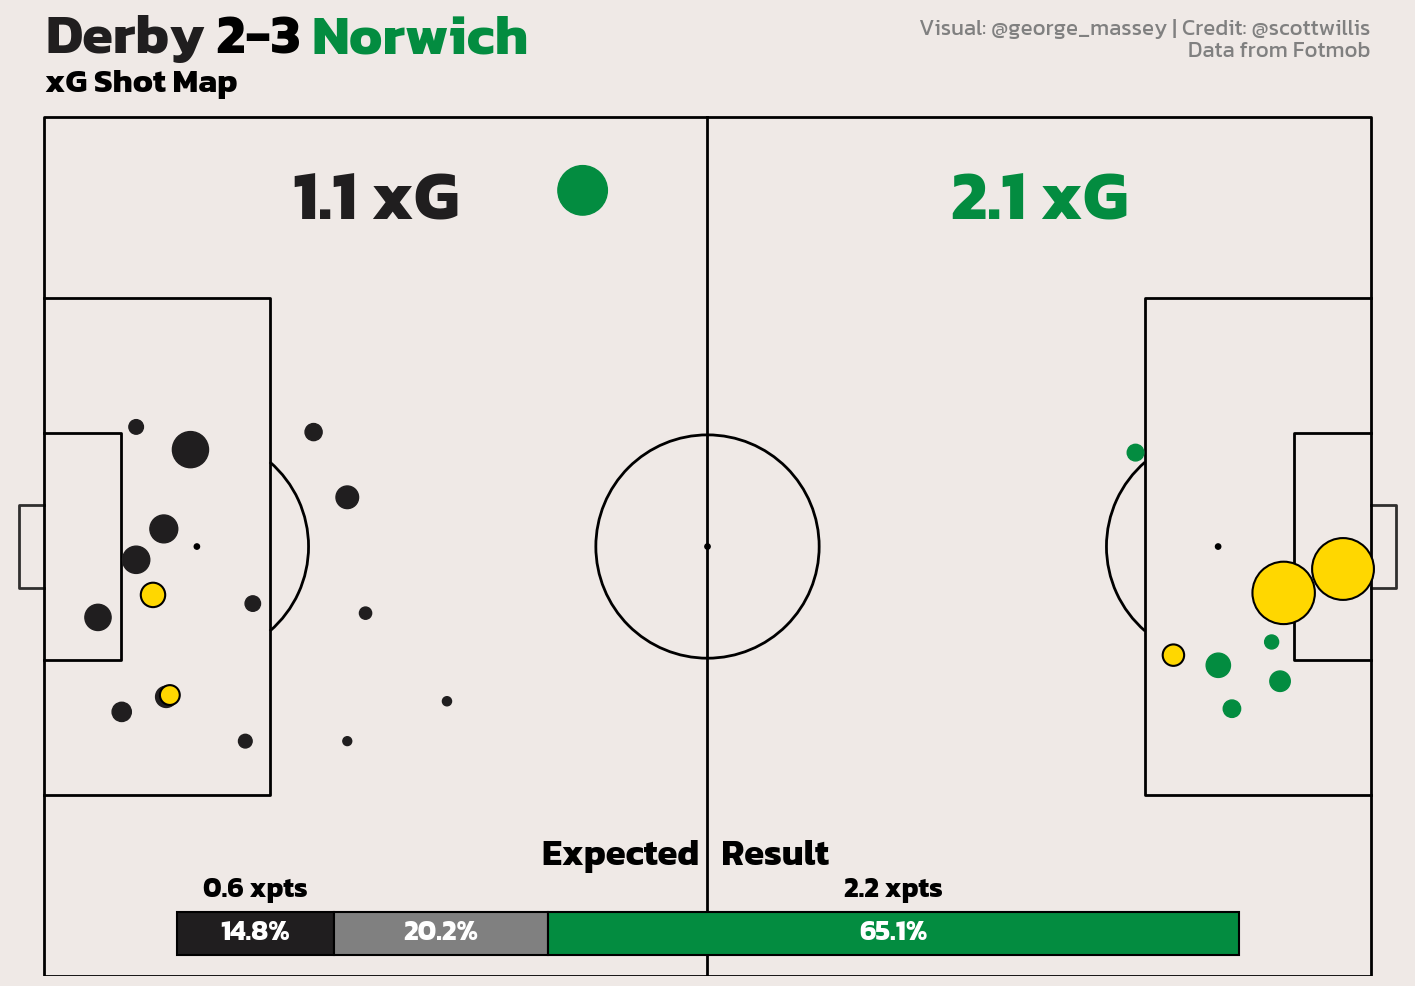

In [56]:
fig, ax3 = plt.subplots(figsize=(18, 18), facecolor='#EFE9E6')
pitch = Pitch(half=False,
                      pad_bottom=0,
                      pitch_type = 'opta',  # pitch extends slightly below halfway line
                      goal_type='box',
                      goal_alpha=0.8,
                      pitch_color='#EFE9E6',
                      line_color='black')  # control the goal transparency

pitch.draw(ax=ax3)

sc1 = pitch.scatter(df_away_non_goals.x+1, df_away_non_goals.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_away_non_goals.expectedGoals * 3000 + 20),
                    #edgecolors='black',  # give the markers a charcoal border
                    c=a_colour,  # no facecolor for the markers
                    #hatch='///',  
                    marker='o',
                    ax=ax3)

sc2 = pitch.scatter(df_away_goals.x+1, df_away_goals.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_away_goals.expectedGoals * 3000 + 20),
                    edgecolors='black',
                    linewidths=1.5,
                    c='gold',
                    #marker='D',
                    ax=ax3)

txt1 = ax3.text(x=25, y=90, s=f'{round(h_cumulative[-1],1)} xG',
              size=50,
              fontproperties=bold, color=h_colour,
              va='center', ha='center')

sc3 = pitch.scatter(99-df_home_non_goals.x, 100-df_home_non_goals.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_home_non_goals.expectedGoals * 3000 + 20),
                    #edgecolors='black',  # give the markers a charcoal border
                    c=h_colour,  # no facecolor for the markers
                    marker='o',
                    ax=ax3)

sc4 = pitch.scatter(99-df_home_goals.x, 100-df_home_goals.y,
                    s=(df_home_goals.expectedGoals * 3000 + 20),
                    edgecolors='black',
                    linewidths=1.5,
                    c='gold',
                    #marker='D',
                    ax=ax3)

txt2 = ax3.text(x=75, y=90, s=f'{round(a_cumulative[-1],1)} xG',
              size=50,
              fontproperties=bold, color=a_colour,
              va='center', ha='center')

highlight_text.ax_text(0.05, 109, f'<{h_team}> {h_goals}-{a_goals} <{a_team}>', size=40, highlight_textprops=[{"color": h_colour}, {"color": a_colour}], ha='left', va='center', fontproperties=bold, color='black')
ax3.text(0.05, 103, 'xG Shot Map', color='black', fontsize=24, ha='left', fontweight='bold',fontproperties=bold)

# Define bar parameters
x_values = [10, 10+home_wins_perc/1.25, 10+(home_wins_perc/1.25)+(draws_perc/1.25)]  # Positions on the x-axis for segments
y_values = [5,5,5]  # Position on the y-axis (slightly below the plot)
bar_widths = [home_wins_perc/1.25, draws_perc/1.25, away_wins_perc/1.25]  # Width of each bar segment
bar_colors = [h_colour, 'grey',a_colour]  # Colors for each segment
labels = [f'{home_wins_perc}%', f'{draws_perc}%', f'{away_wins_perc}%']  # Labels for each segment
point_labels = [f'{home_wins_perc}%', f'{draws_perc}%', f'{away_wins_perc}%']
# Create a new axis for the horizontal bar
# Add horizontal bars
for x2, y2, width, color, label in zip(x_values, y_values, bar_widths, bar_colors, labels):
    ax3.barh(y2, width, left=x2, height=5, color=color, alpha=1, label=label, align='center', edgecolor='black', linewidth=1.5)

for x3, y3, width, label in zip(x_values, y_values, bar_widths, labels):
    ax3.text(x3 + width / 2, y3, label, ha='center', va='center', color='white', fontsize=20, fontweight='bold',fontproperties=bold)

ax3.text(10+(home_wins_perc/1.25)/2, 10, f'{home_xp} xpts', ha='center', va='center', color='black', fontsize=20, fontweight='bold',fontproperties=bold)
ax3.text(10+(home_wins_perc/1.25+draws_perc/1.25)+((away_wins_perc/1.25)/2), 10, f'{away_xp} xpts', ha='center', va='center', color='black', fontsize=20, fontweight='bold',fontproperties=bold)
# Adjust plot limits
ax3.text(37.5, 14, 'Expected   Result', ha='left', va='center', color='black', fontsize=26, fontweight='bold',fontproperties=bold)
ax3.text(100,107,'Visual: @george_massey | Credit: @scottwillis\nData from Fotmob',color='grey',fontsize=16,ha='right',fontweight='bold',fontproperties=regular)
fig.savefig(f"C:/Users/George/Documents/Football Analytics/Visuals/{h_team} vs {a_team} xG Shotmap.png", facecolor=fig.get_facecolor(), dpi=200, bbox_inches="tight")